In [1]:
import pandas as pd
import numpy as np
import time
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import sklearn.metrics as metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.shape

(2111, 17)

In [6]:
labelencoder = LabelEncoder()
df['NObeyesdad'] = labelencoder.fit_transform(df['NObeyesdad'])

In [7]:
obesity_numeric = df[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

#one-hot
obesity_dummies = pd.get_dummies(df[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])

#Class
obesity_label = df[["NObeyesdad"]]

In [8]:
df2 = pd.concat([obesity_numeric, obesity_dummies, obesity_label], axis = 1)

In [9]:
df2.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,0,1,0,0,0,0,1,0,1
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,1,0,0,0,0,0,1,0,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,5
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,6


In [10]:
df2.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,0,1,0,0,0,0,1,0,1
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,1,0,0,0,0,0,1,0,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,5
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,6


In [11]:
Total_time=[]
Total_purity=[]
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

# KMeans

In [12]:
time_start_KMeans=time.time()
clustering_KMeans = KMeans(n_clusters=7, random_state=11)
clustering_KMeans.fit(df2.iloc[:,:31].values)
time_end_KMeans=time.time()
KMeans_label_pred = clustering_KMeans.labels_
time_KMeans=time_end_KMeans-time_start_KMeans

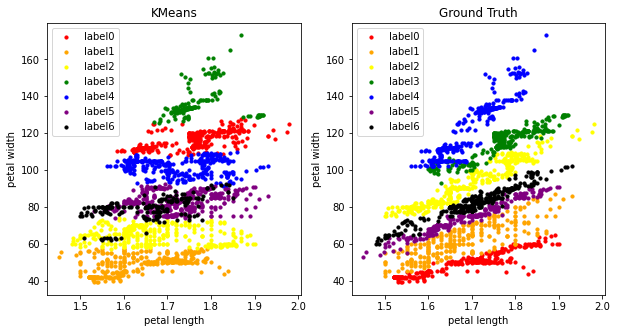

In [13]:
x0 = df2[KMeans_label_pred == 0]
x1 = df2[KMeans_label_pred == 1]
x2 = df2[KMeans_label_pred == 2]
x3 = df2[KMeans_label_pred == 3]
x4 = df2[KMeans_label_pred == 4]
x5 = df2[KMeans_label_pred == 5]
x6 = df2[KMeans_label_pred == 6]
x00 = df2[df2['NObeyesdad']==0]
x11 = df2[df2['NObeyesdad']==1]
x22 = df2[df2['NObeyesdad']==2]
x33 = df2[df2['NObeyesdad']==3]
x44 = df2[df2['NObeyesdad']==4]
x55 = df2[df2['NObeyesdad']==5]
x66 = df2[df2['NObeyesdad']==6]

plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
ax1.set_title('KMeans')
ax1.scatter(x0['Height'], x0['Weight'], c="red", marker='o', label='label0',s=10)  
ax1.scatter(x1['Height'], x1['Weight'], c="orange", marker='o', label='label1',s=10)  
ax1.scatter(x2['Height'], x2['Weight'], c="yellow", marker='o', label='label2',s=10)  
ax1.scatter(x3['Height'], x3['Weight'], c="green", marker='o', label='label3',s=10)  
ax1.scatter(x4['Height'], x4['Weight'], c="blue", marker='o', label='label4',s=10)  
ax1.scatter(x5['Height'], x5['Weight'], c="purple", marker='o', label='label5',s=10)  
ax1.scatter(x6['Height'], x6['Weight'], c="black", marker='o', label='label6',s=10)  

ax2=plt.subplot(1,2,2)
ax2.set_title('Ground Truth')
ax2.scatter(x00['Height'], x00['Weight'], c="red", marker='o', label='label0',s=10)  
ax2.scatter(x11['Height'], x11['Weight'], c="orange", marker='o', label='label1',s=10)  
ax2.scatter(x22['Height'], x22['Weight'], c="yellow", marker='o', label='label2',s=10)  
ax2.scatter(x33['Height'], x33['Weight'], c="green", marker='o', label='label3',s=10)  
ax2.scatter(x44['Height'], x44['Weight'], c="blue", marker='o', label='label4',s=10)  
ax2.scatter(x55['Height'], x55['Weight'], c="purple", marker='o', label='label5',s=10)  
ax2.scatter(x66['Height'], x66['Weight'], c="black", marker='o', label='label6',s=10)  
[ax.set_xlabel("petal length") for ax in [ax1,ax2]]
[ax.set_ylabel("petal width") for ax in [ax1,ax2]]
[ax.legend(loc=2)  for ax in [ax1,ax2]]

plt.show() 

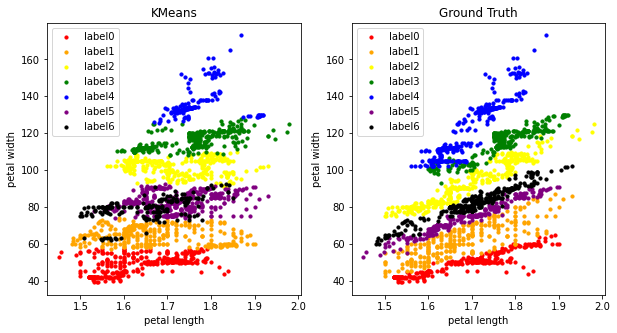

In [14]:
relabel = np.choose(KMeans_label_pred,[3,0,1,4,2,5,6]).astype(np.int64)
#relabel = np.choose(KMeans_label_pred,[2,6,3,4,5,0,1]).astype(np.int64)

x0 = df2[relabel == 0]
x1 = df2[relabel == 1]
x2 = df2[relabel == 2]
x3 = df2[relabel == 3]
x4 = df2[relabel == 4]
x5 = df2[relabel == 5]
x6 = df2[relabel == 6]
x00 = df2[df2['NObeyesdad']==0]
x11 = df2[df2['NObeyesdad']==1]
x22 = df2[df2['NObeyesdad']==2]
x33 = df2[df2['NObeyesdad']==3]
x44 = df2[df2['NObeyesdad']==4]
x55 = df2[df2['NObeyesdad']==5]
x66 = df2[df2['NObeyesdad']==6]

plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
ax1.set_title('KMeans')
ax1.scatter(x0['Height'], x0['Weight'], c="red", marker='o', label='label0',s=10)  
ax1.scatter(x1['Height'], x1['Weight'], c="orange", marker='o', label='label1',s=10)  
ax1.scatter(x2['Height'], x2['Weight'], c="yellow", marker='o', label='label2',s=10)  
ax1.scatter(x3['Height'], x3['Weight'], c="green", marker='o', label='label3',s=10)  
ax1.scatter(x4['Height'], x4['Weight'], c="blue", marker='o', label='label4',s=10)  
ax1.scatter(x5['Height'], x5['Weight'], c="purple", marker='o', label='label5',s=10)  
ax1.scatter(x6['Height'], x6['Weight'], c="black", marker='o', label='label6',s=10)  

ax2=plt.subplot(1,2,2)
ax2.set_title('Ground Truth')
ax2.scatter(x00['Height'], x00['Weight'], c="red", marker='o', label='label0',s=10)  
ax2.scatter(x11['Height'], x11['Weight'], c="orange", marker='o', label='label1',s=10)  
ax2.scatter(x22['Height'], x22['Weight'], c="yellow", marker='o', label='label2',s=10)  
ax2.scatter(x33['Height'], x33['Weight'], c="green", marker='o', label='label3',s=10)  
ax2.scatter(x44['Height'], x44['Weight'], c="blue", marker='o', label='label4',s=10)  
ax2.scatter(x55['Height'], x55['Weight'], c="purple", marker='o', label='label5',s=10)  
ax2.scatter(x66['Height'], x66['Weight'], c="black", marker='o', label='label6',s=10)  
[ax.set_xlabel("petal length") for ax in [ax1,ax2]]
[ax.set_ylabel("petal width") for ax in [ax1,ax2]]
[ax.legend(loc=2)  for ax in [ax1,ax2]]

plt.show() 

In [15]:
Total_time.append(time_KMeans)
Total_purity.append(purity_score(df2['NObeyesdad'],relabel))
print("KMeans_time:",time_KMeans)
print("Purity:",purity_score(df2['NObeyesdad'],relabel))

KMeans_time: 0.258167028427124
Purity: 0.5253434391283752


In [16]:
print(classification_report(df2['NObeyesdad'],relabel))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       272
           1       0.45      0.54      0.50       287
           2       0.46      0.42      0.44       351
           3       0.63      0.75      0.69       297
           4       0.89      0.42      0.57       324
           5       0.32      0.48      0.38       290
           6       0.42      0.26      0.32       290

    accuracy                           0.52      2111
   macro avg       0.55      0.53      0.52      2111
weighted avg       0.56      0.52      0.52      2111



# Agglomerative_hierarchy

In [17]:
time_start_Agg=time.time()
clustering_Agg=AgglomerativeClustering(n_clusters=7,affinity='euclidean',linkage='ward')
clustering_Agg.fit(df2.iloc[:,:31].values)
#clustering_Agg.fit_predict(df.iloc[:,:4].values)
Agg_label_pred = clustering_Agg.labels_
time_end_Agg=time.time()
time_Agg=time_end_Agg-time_start_Agg

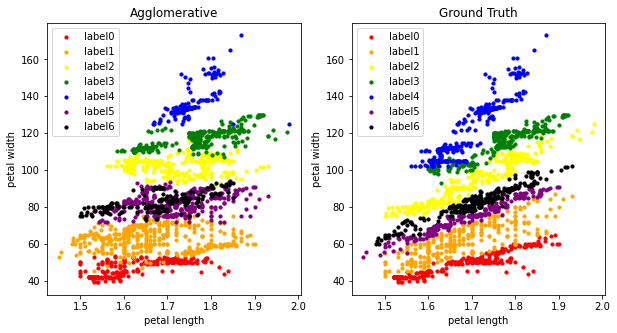

In [18]:
relabe2 = np.choose(Agg_label_pred,[1,4,2,5,0,6,3]).astype(np.int64)
x0 = df2[relabe2 == 0]
x1 = df2[relabe2 == 1]
x2 = df2[relabe2 == 2]
x3 = df2[relabe2 == 3]
x4 = df2[relabe2 == 4]
x5 = df2[relabe2 == 5]
x6 = df2[relabe2 == 6]
x00 = df2[df2['NObeyesdad']==0]
x11 = df2[df2['NObeyesdad']==1]
x22 = df2[df2['NObeyesdad']==2]
x33 = df2[df2['NObeyesdad']==3]
x44 = df2[df2['NObeyesdad']==4]
x55 = df2[df2['NObeyesdad']==5]
x66 = df2[df2['NObeyesdad']==6]

plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
ax1.set_title('Agglomerative')
ax1.scatter(x0['Height'], x0['Weight'], c="red", marker='o', label='label0',s=10)  
ax1.scatter(x1['Height'], x1['Weight'], c="orange", marker='o', label='label1',s=10)  
ax1.scatter(x2['Height'], x2['Weight'], c="yellow", marker='o', label='label2',s=10)  
ax1.scatter(x3['Height'], x3['Weight'], c="green", marker='o', label='label3',s=10)  
ax1.scatter(x4['Height'], x4['Weight'], c="blue", marker='o', label='label4',s=10)  
ax1.scatter(x5['Height'], x5['Weight'], c="purple", marker='o', label='label5',s=10)  
ax1.scatter(x6['Height'], x6['Weight'], c="black", marker='o', label='label6',s=10)  

ax2=plt.subplot(1,2,2)
ax2.set_title('Ground Truth')
ax2.scatter(x00['Height'], x00['Weight'], c="red", marker='o', label='label0',s=10)  
ax2.scatter(x11['Height'], x11['Weight'], c="orange", marker='o', label='label1',s=10)  
ax2.scatter(x22['Height'], x22['Weight'], c="yellow", marker='o', label='label2',s=10)  
ax2.scatter(x33['Height'], x33['Weight'], c="green", marker='o', label='label3',s=10)  
ax2.scatter(x44['Height'], x44['Weight'], c="blue", marker='o', label='label4',s=10)  
ax2.scatter(x55['Height'], x55['Weight'], c="purple", marker='o', label='label5',s=10)  
ax2.scatter(x66['Height'], x66['Weight'], c="black", marker='o', label='label6',s=10)  
[ax.set_xlabel("petal length") for ax in [ax1,ax2]]
[ax.set_ylabel("petal width") for ax in [ax1,ax2]]
[ax.legend(loc=2)  for ax in [ax1,ax2]]

plt.show() 

In [19]:
Total_time.append(time_Agg)
Total_purity.append(purity_score(df2['NObeyesdad'],relabe2))
print("Agglomerative_time:",time_Agg)
print("Purity:",purity_score(df2['NObeyesdad'],relabe2))

Agglomerative_time: 0.20296740531921387
Purity: 0.531501657981999


In [20]:
print(classification_report(df2['NObeyesdad'],relabe2))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       272
           1       0.45      0.69      0.55       287
           2       0.43      0.41      0.42       351
           3       0.62      0.70      0.66       297
           4       0.99      0.43      0.59       324
           5       0.30      0.44      0.36       290
           6       0.48      0.30      0.37       290

    accuracy                           0.52      2111
   macro avg       0.58      0.53      0.53      2111
weighted avg       0.58      0.52      0.53      2111



# Scipy_hierarchy

In [21]:
import scipy.cluster.hierarchy as sch

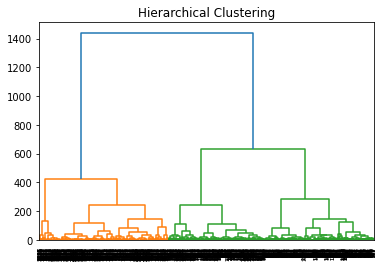

In [22]:
k=7
time_start_hierarchy=time.time()
dis=sch.linkage(df2.iloc[:,:31],metric='euclidean',method='ward')
sch.dendrogram(dis)
plt.title('Hierarchical Clustering')
clustering_Scipy=sch.fcluster(dis,k,criterion='maxclust')
time_end_hierarchy=time.time()
time_Scipy=time_end_hierarchy-time_start_hierarchy
plt.show()

In [23]:
clustering_Scipy=clustering_Scipy-1

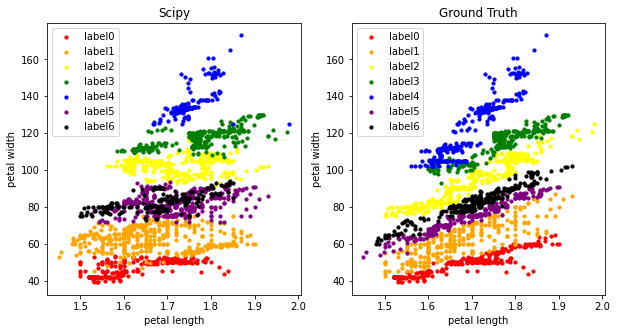

In [24]:
relabe3 = np.choose(Agg_label_pred,[1,4,2,5,0,6,3]).astype(np.int64)
x0 = df2[relabe3 == 0]
x1 = df2[relabe3 == 1]
x2 = df2[relabe3 == 2]
x3 = df2[relabe3 == 3]
x4 = df2[relabe3 == 4]
x5 = df2[relabe3 == 5]
x6 = df2[relabe3 == 6]
x00 = df2[df2['NObeyesdad']==0]
x11 = df2[df2['NObeyesdad']==1]
x22 = df2[df2['NObeyesdad']==2]
x33 = df2[df2['NObeyesdad']==3]
x44 = df2[df2['NObeyesdad']==4]
x55 = df2[df2['NObeyesdad']==5]
x66 = df2[df2['NObeyesdad']==6]

plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
ax1.set_title('Scipy')
ax1.scatter(x0['Height'], x0['Weight'], c="red", marker='o', label='label0',s=10)  
ax1.scatter(x1['Height'], x1['Weight'], c="orange", marker='o', label='label1',s=10)  
ax1.scatter(x2['Height'], x2['Weight'], c="yellow", marker='o', label='label2',s=10)  
ax1.scatter(x3['Height'], x3['Weight'], c="green", marker='o', label='label3',s=10)  
ax1.scatter(x4['Height'], x4['Weight'], c="blue", marker='o', label='label4',s=10)  
ax1.scatter(x5['Height'], x5['Weight'], c="purple", marker='o', label='label5',s=10)  
ax1.scatter(x6['Height'], x6['Weight'], c="black", marker='o', label='label6',s=10)  

ax2=plt.subplot(1,2,2)
ax2.set_title('Ground Truth')
ax2.scatter(x00['Height'], x00['Weight'], c="red", marker='o', label='label0',s=10)  
ax2.scatter(x11['Height'], x11['Weight'], c="orange", marker='o', label='label1',s=10)  
ax2.scatter(x22['Height'], x22['Weight'], c="yellow", marker='o', label='label2',s=10)  
ax2.scatter(x33['Height'], x33['Weight'], c="green", marker='o', label='label3',s=10)  
ax2.scatter(x44['Height'], x44['Weight'], c="blue", marker='o', label='label4',s=10)  
ax2.scatter(x55['Height'], x55['Weight'], c="purple", marker='o', label='label5',s=10)  
ax2.scatter(x66['Height'], x66['Weight'], c="black", marker='o', label='label6',s=10)  
[ax.set_xlabel("petal length") for ax in [ax1,ax2]]
[ax.set_ylabel("petal width") for ax in [ax1,ax2]]
[ax.legend(loc=2)  for ax in [ax1,ax2]]

plt.show() 

In [25]:
Total_time.append(time_Scipy)
Total_purity.append(purity_score(df2['NObeyesdad'],relabe3))
print("Scipy_time:",time_Scipy)
print("Purity:",purity_score(df2['NObeyesdad'],relabe3))

Scipy_time: 3.934077262878418
Purity: 0.531501657981999


In [26]:
print(classification_report(df2['NObeyesdad'],relabe3))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       272
           1       0.45      0.69      0.55       287
           2       0.43      0.41      0.42       351
           3       0.62      0.70      0.66       297
           4       0.99      0.43      0.59       324
           5       0.30      0.44      0.36       290
           6       0.48      0.30      0.37       290

    accuracy                           0.52      2111
   macro avg       0.58      0.53      0.53      2111
weighted avg       0.58      0.52      0.53      2111



# DBSCAN

min_samples: 5
eps: [12.767286320906257]
min_samples: 6
eps: [12.767286320906257]
min_samples: 7
eps: [12.767286320906257]
min_samples: 8
eps: [12.767286320906257]
min_samples: 9
eps: [12.767286320906257]
min_samples: 10
eps: [12.767286320906257]


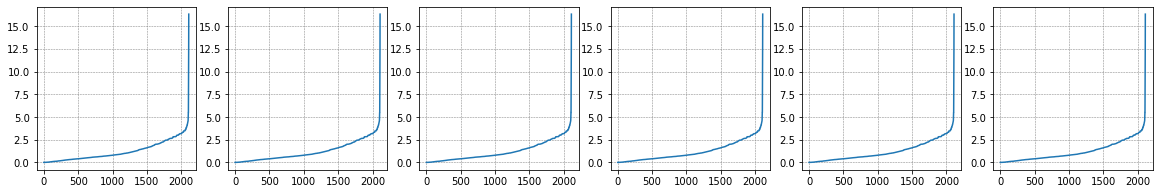

In [27]:
j=1
plt.figure(figsize=(20,3))
for i in range(5,11):
    neighbors = NearestNeighbors(n_neighbors=i)
    neighbors_fit = neighbors.fit(df2)
    distances, indices = neighbors_fit.kneighbors(df2)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.subplot(1,6,j)
    plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
    plt.plot(distances)
    
    j+=1
    index=[]
    score=[]
    fin_score=[]
    fin_eps=[]
    for k in range(len(distances)):
        if k==0:
            continue
        else:
            if(distances[k]!=distances[k-1]):
                index.append(k)
                score.append(distances[k]-distances[k-1])
                fin_score.append(distances[k-1])

    max_score=max(score)
    for l in range(len(index)):
        if(score[l]==max_score):
            fin_eps.append(fin_score[l])
            print("min_samples:",i)
            print("eps:",fin_eps)

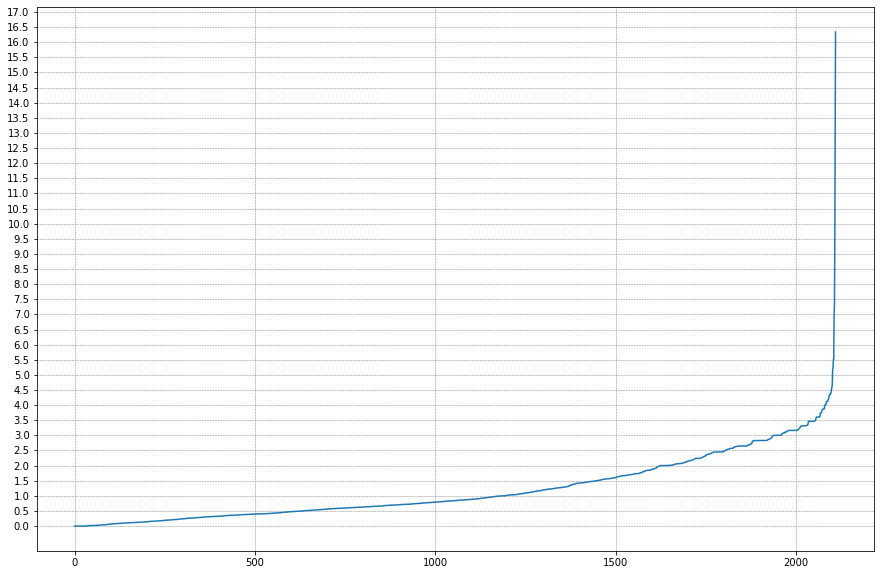

In [28]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df2)
distances, indices = neighbors_fit.kneighbors(df2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,10))
plt.yticks(np.arange(0, 18, step=0.5))
plt.grid(True,linestyle = "--",color = 'gray' ,linewidth = '0.5',axis='both')
plt.plot(distances)

In [29]:
time_start_DBSCAN=time.time()
clustering_Dbscan = DBSCAN(eps=3.5, min_samples=5)
clustering_Dbscan.fit(df2.iloc[:,:31].values)
Dbscan_label_pred = clustering_Dbscan.labels_
time_end_DBSCAN=time.time()
time_DBSCAN=time_end_DBSCAN-time_start_DBSCAN

In [30]:
Dbscan_label_pred=Dbscan_label_pred+1

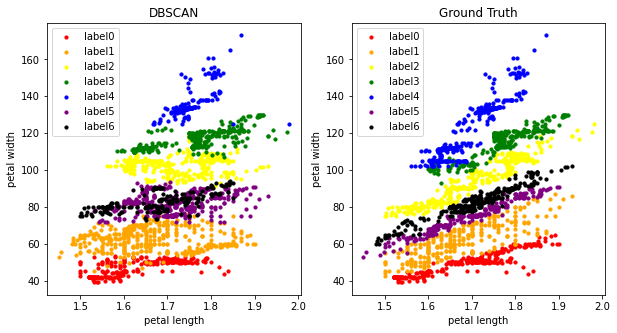

In [31]:
relabe4 = np.choose(Agg_label_pred,[1,4,2,5,0,6,3]).astype(np.int64)
x0 = df2[relabe4 == 0]
x1 = df2[relabe4 == 1]
x2 = df2[relabe4 == 2]
x3 = df2[relabe4 == 3]
x4 = df2[relabe4 == 4]
x5 = df2[relabe4 == 5]
x6 = df2[relabe4 == 6]
x00 = df2[df2['NObeyesdad']==0]
x11 = df2[df2['NObeyesdad']==1]
x22 = df2[df2['NObeyesdad']==2]
x33 = df2[df2['NObeyesdad']==3]
x44 = df2[df2['NObeyesdad']==4]
x55 = df2[df2['NObeyesdad']==5]
x66 = df2[df2['NObeyesdad']==6]

plt.figure(figsize=(10,5))
ax1=plt.subplot(1,2,1)
ax1.set_title('DBSCAN')
ax1.scatter(x0['Height'], x0['Weight'], c="red", marker='o', label='label0',s=10)  
ax1.scatter(x1['Height'], x1['Weight'], c="orange", marker='o', label='label1',s=10)  
ax1.scatter(x2['Height'], x2['Weight'], c="yellow", marker='o', label='label2',s=10)  
ax1.scatter(x3['Height'], x3['Weight'], c="green", marker='o', label='label3',s=10)  
ax1.scatter(x4['Height'], x4['Weight'], c="blue", marker='o', label='label4',s=10)  
ax1.scatter(x5['Height'], x5['Weight'], c="purple", marker='o', label='label5',s=10)  
ax1.scatter(x6['Height'], x6['Weight'], c="black", marker='o', label='label6',s=10)  

ax2=plt.subplot(1,2,2)
ax2.set_title('Ground Truth')
ax2.scatter(x00['Height'], x00['Weight'], c="red", marker='o', label='label0',s=10)  
ax2.scatter(x11['Height'], x11['Weight'], c="orange", marker='o', label='label1',s=10)  
ax2.scatter(x22['Height'], x22['Weight'], c="yellow", marker='o', label='label2',s=10)  
ax2.scatter(x33['Height'], x33['Weight'], c="green", marker='o', label='label3',s=10)  
ax2.scatter(x44['Height'], x44['Weight'], c="blue", marker='o', label='label4',s=10)  
ax2.scatter(x55['Height'], x55['Weight'], c="purple", marker='o', label='label5',s=10)  
ax2.scatter(x66['Height'], x66['Weight'], c="black", marker='o', label='label6',s=10)  
[ax.set_xlabel("petal length") for ax in [ax1,ax2]]
[ax.set_ylabel("petal width") for ax in [ax1,ax2]]
[ax.legend(loc=2)  for ax in [ax1,ax2]]

plt.show() 

In [32]:
Total_time.append(time_DBSCAN)
Total_purity.append(purity_score(df2['NObeyesdad'],relabe4))
print("DBSCAN_time:",time_DBSCAN)
print("Purity:",purity_score(df2['NObeyesdad'],relabe4))

DBSCAN_time: 0.09278583526611328
Purity: 0.531501657981999


In [33]:
print(classification_report(df2['NObeyesdad'],relabe4))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       272
           1       0.45      0.69      0.55       287
           2       0.43      0.41      0.42       351
           3       0.62      0.70      0.66       297
           4       0.99      0.43      0.59       324
           5       0.30      0.44      0.36       290
           6       0.48      0.30      0.37       290

    accuracy                           0.52      2111
   macro avg       0.58      0.53      0.53      2111
weighted avg       0.58      0.52      0.53      2111



# Score

In [35]:
col=['KMeans','Agglomerative','Scipy','DBSCAN']
ind=['Time','Purity']
fin_time=pd.DataFrame(Total_time).T
fin_purity=pd.DataFrame(Total_purity).T
fin=pd.concat([fin_time,fin_purity],axis=0)
fin.columns=col
fin.index=ind
fin

,KMeans,Agglomerative,Scipy,DBSCAN
Time,0.240356,0.216420,6.037635,0.093318
Purity,0.525343,0.531502,0.531502,0.531502


In [35]:
# #z-score
col=['KMeans','Agglomerative','Scipy','DBSCAN']
ind=['Time','Purity']
fin_time=pd.DataFrame(Total_time).T
fin_purity=pd.DataFrame(Total_purity).T
fin=pd.concat([fin_time,fin_purity],axis=0)
fin.columns=col
fin.index=ind
fin

,KMeans,Agglomerative,Scipy,DBSCAN
Time,0.173534,0.237364,4.351645,0.156580
Purity,0.436286,0.437707,0.437707,0.437707


In [35]:
#StandardScaler
col=['KMeans','Agglomerative','Scipy','DBSCAN']
ind=['Time','Purity']
fin_time=pd.DataFrame(Total_time).T
fin_purity=pd.DataFrame(Total_purity).T
fin=pd.concat([fin_time,fin_purity],axis=0)
fin.columns=col
fin.index=ind
fin

,KMeans,Agglomerative,Scipy,DBSCAN
Time,0.204453,0.203453,4.247063,0.094271
Purity,0.379441,0.445760,0.445760,0.445760


In [35]:
#MinMaxScaler
col=['KMeans','Agglomerative','Scipy','DBSCAN']
ind=['Time','Purity']
fin_time=pd.DataFrame(Total_time).T
fin_purity=pd.DataFrame(Total_purity).T
fin=pd.concat([fin_time,fin_purity],axis=0)
fin.columns=col
fin.index=ind
fin

,KMeans,Agglomerative,Scipy,DBSCAN
Time,0.181027,0.266287,4.413974,0.153590
Purity,0.436286,0.437707,0.437707,0.437707


In [35]:
#MaxAbsScaler
col=['KMeans','Agglomerative','Scipy','DBSCAN']
ind=['Time','Purity']
fin_time=pd.DataFrame(Total_time).T
fin_purity=pd.DataFrame(Total_purity).T
fin=pd.concat([fin_time,fin_purity],axis=0)
fin.columns=col
fin.index=ind
fin

,KMeans,Agglomerative,Scipy,DBSCAN
Time,0.183024,0.213934,4.789824,0.170059
Purity,0.420180,0.477973,0.477973,0.477973


In [35]:
#RobustScaler
col=['KMeans','Agglomerative','Scipy','DBSCAN']
ind=['Time','Purity']
fin_time=pd.DataFrame(Total_time).T
fin_purity=pd.DataFrame(Total_purity).T
fin=pd.concat([fin_time,fin_purity],axis=0)
fin.columns=col
fin.index=ind
fin

,KMeans,Agglomerative,Scipy,DBSCAN
Time,0.261813,0.229977,4.198965,0.144127
Purity,0.412127,0.408811,0.408811,0.408811
